In [2]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Define the file path
date = 240826
name = "application_colour"
k = 5
file_path = f"C:\\Users\\david\\OneDrive\\Documents\\01_Architektur\\02_MA Architektur\\TUM\\2024_Sommersemester\\01_THESIS\\02_MA_Thesis\\02_Listing\\01_Visual_Studio\\240816_Simulation\\02-4_Clustering-Tests\\{date}_{name}_Brick_cluster_k{k}.csv"


try:
    bd = pd.read_csv(file_path, sep=",", encoding="utf-8")
    print("utf-8 encoder used")
except UnicodeDecodeError:
    bd = pd.read_csv(file_path, sep=",", encoding="ISO-8859-1")
    print("ISO-8859-1 encoder used")


features = [
   
    "hue (0.1 - 10.0)",
    "colour rests (%)",
    

    #"lu (mm)",
   #"wu (mm)",
    #"hu (mm)",
    #"volume (%)",
    
    #"pitch (0.1 - 10.0)",
    "density (kg/m3)",

    "UPV (km/s)",
    "fst (N/mm2)",
    "fk (N/mm2)",


    "mortar rests (%)",
    "IRA (kg/(m2*min))",
    
    "RPV (%)" 
]

def test_statistics(values):
    mean_value = np.mean(values) # not used in this code
    std_value = np.std(values, ddof=1)  # not used in this code
    CoV = (std_value / mean_value) # not used in this code
    min_value = np.min(values)
    max_value = np.max(values)
    return mean_value, std_value, CoV, min_value, max_value

def normalise(mean_value, min_value, max_value):
    return 0.1 + ((mean_value - min_value) / (max_value - min_value)) * (1.0 - 0.1)

min_max_values = {}
for feature in features:
    mean_value, stad_value, CoV, min_value, max_value = test_statistics(bd[feature])
    min_max_values[feature] = (min_value, max_value)




cluster_means = bd.groupby("brick_clusters")[features].mean()
cluster_min = bd.groupby("brick_clusters")[features].min()
cluster_max = bd.groupby("brick_clusters")[features].max()

print("")
print(f"Cluster means : {cluster_means}")

utf-8 encoder used

Cluster means :                 hue (0.1 - 10.0)  colour rests (%)  density (kg/m3)  \
brick_clusters                                                        
0                       9.044181          0.038767      3065.586193   
1                       2.440537          0.038242      1553.644609   
2                       7.487108          0.041128      2711.495971   
3                       8.552889          0.039687      2953.336116   
4                       3.719220          0.039569      1846.603488   

                UPV (km/s)  fst (N/mm2)  fk (N/mm2)  mortar rests (%)  \
brick_clusters                                                          
0                 3.224753    58.675256   10.160128          0.311469   
1                 1.378806    13.337307    4.834118          0.307723   
2                 2.808147    44.800278    9.497645          0.317959   
3                 3.072793    53.776356    9.952945          0.322745   
4                 1.713543  


Cluster 0:
hue (0.1 - 10.0) (min, max, mean): 7.00, 10.00, 9.04
colour rests (%) (min, max, mean): 0.01, 0.15, 0.04
density (kg/m3) (min, max, mean): 2601.40, 3302.40, 3065.59
UPV (km/s) (min, max, mean): 2.20, 3.50, 3.22
fst (N/mm2) (min, max, mean): 24.24, 66.00, 58.68
fk (N/mm2) (min, max, mean): 7.11, 10.22, 10.16
mortar rests (%) (min, max, mean): 0.00, 0.90, 0.31
IRA (kg/(m2*min)) (min, max, mean): 1.00, 2.30, 1.41
RPV (%) (min, max, mean): 0.48, 0.73, 0.64

Cluster 1:
hue (0.1 - 10.0) (min, max, mean): 0.40, 5.20, 2.44
colour rests (%) (min, max, mean): 0.01, 0.15, 0.04
density (kg/m3) (min, max, mean): 1050.80, 2173.40, 1553.64
UPV (km/s) (min, max, mean): 0.70, 2.20, 1.38
fst (N/mm2) (min, max, mean): 4.85, 39.05, 13.34
fk (N/mm2) (min, max, mean): 2.78, 9.40, 4.83
mortar rests (%) (min, max, mean): 0.00, 0.90, 0.31
IRA (kg/(m2*min)) (min, max, mean): 2.90, 5.00, 4.20
RPV (%) (min, max, mean): 0.80, 0.98, 0.91

Cluster 2:
hue (0.1 - 10.0) (min, max, mean): 5.20, 9.40, 7.49
co

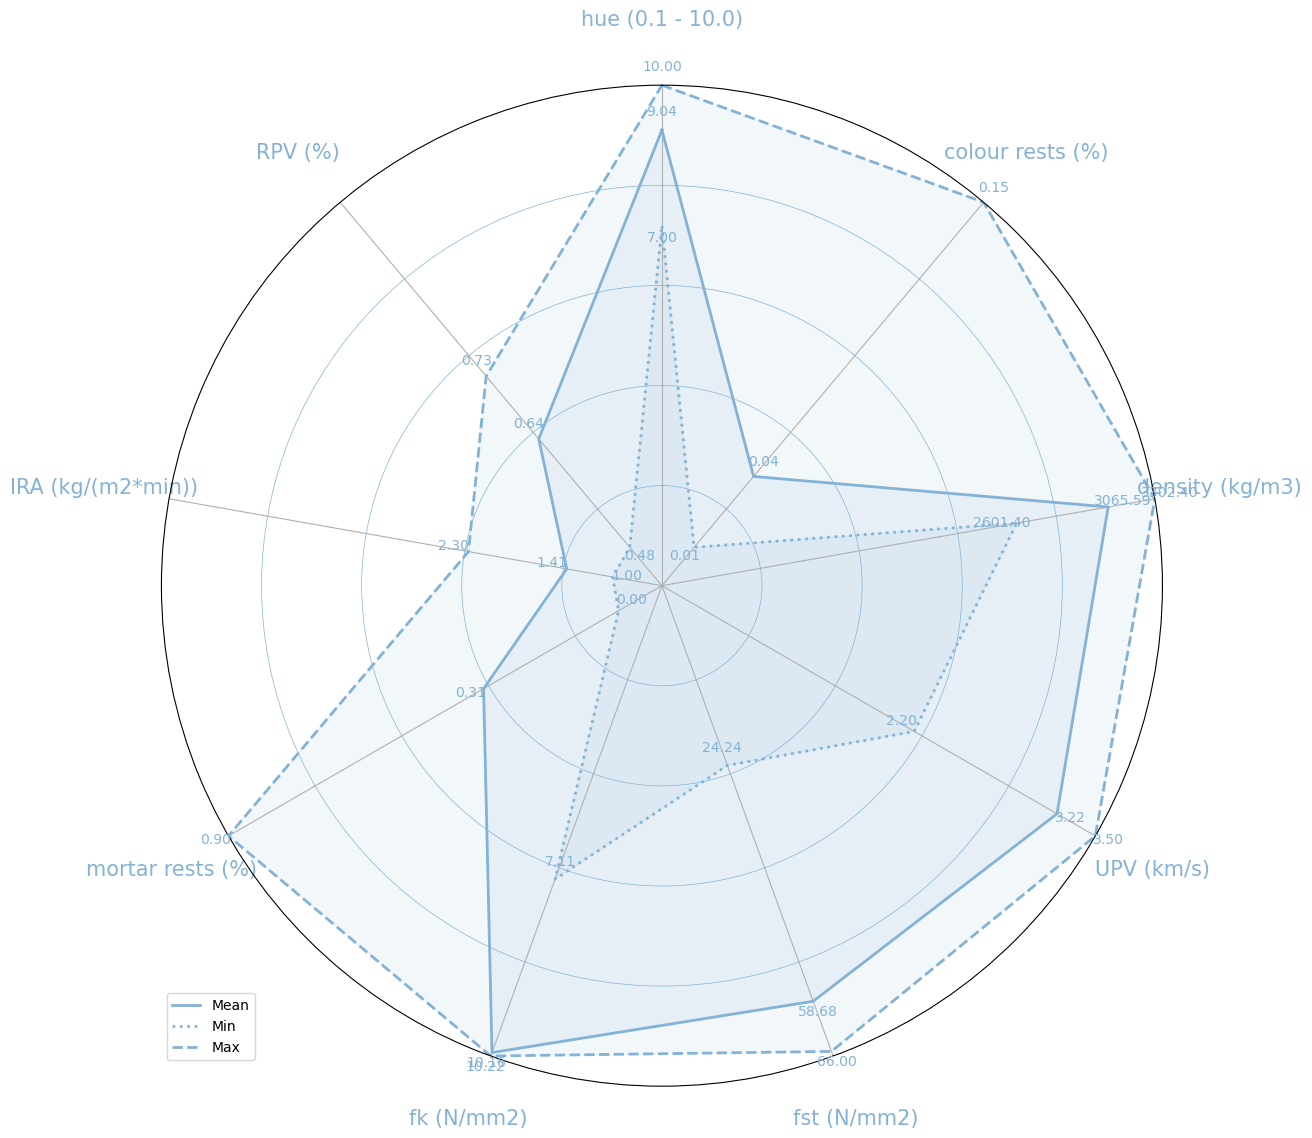

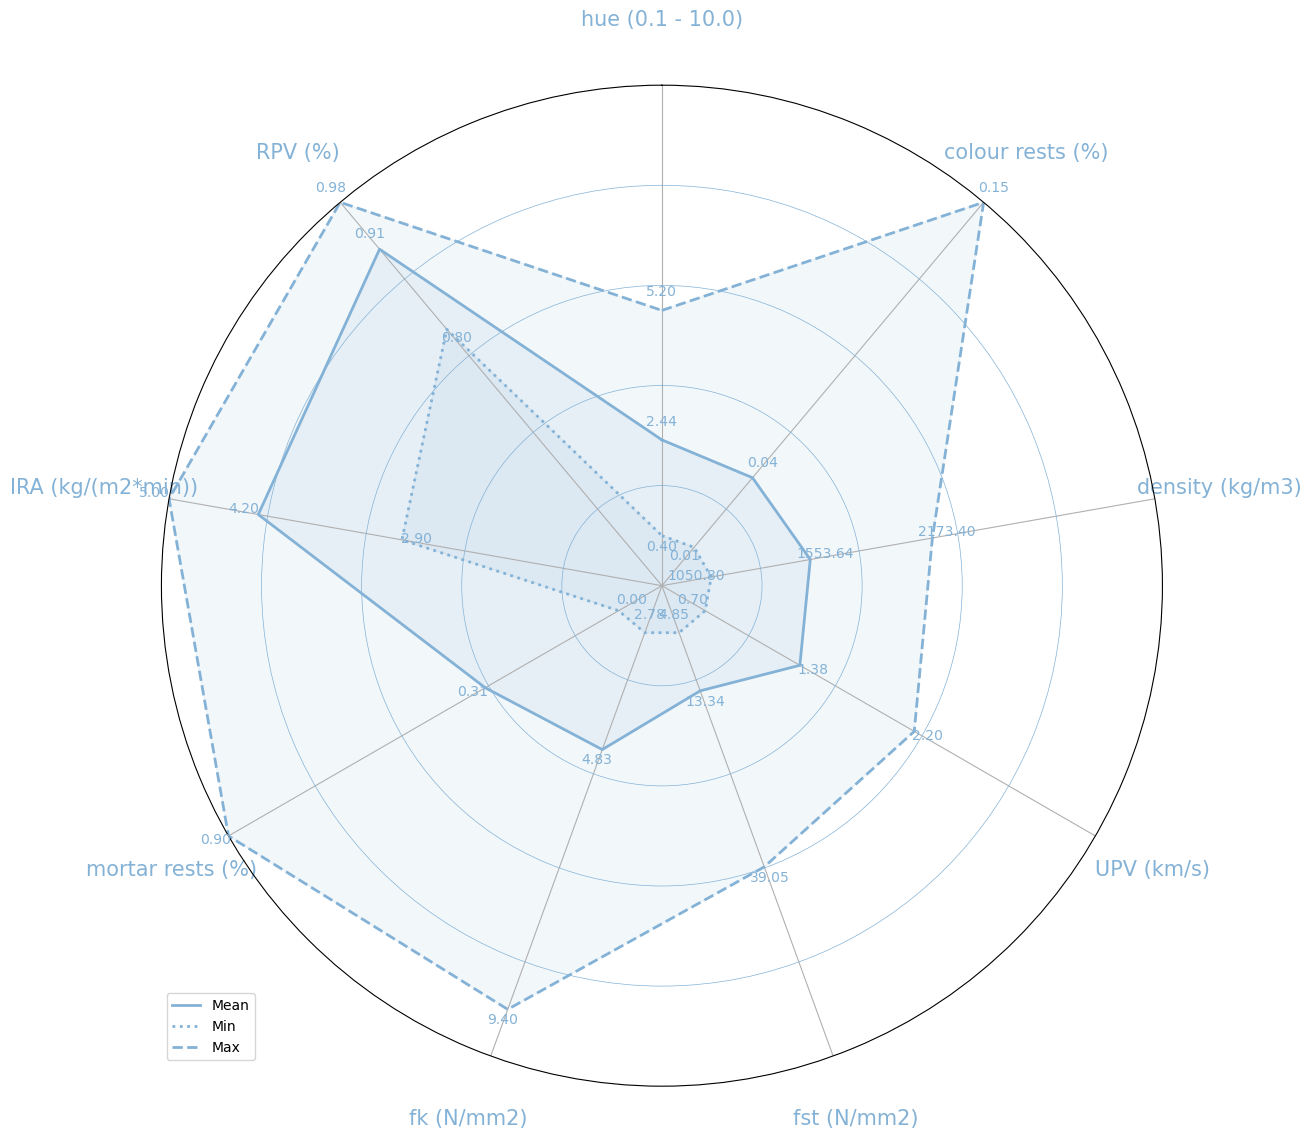

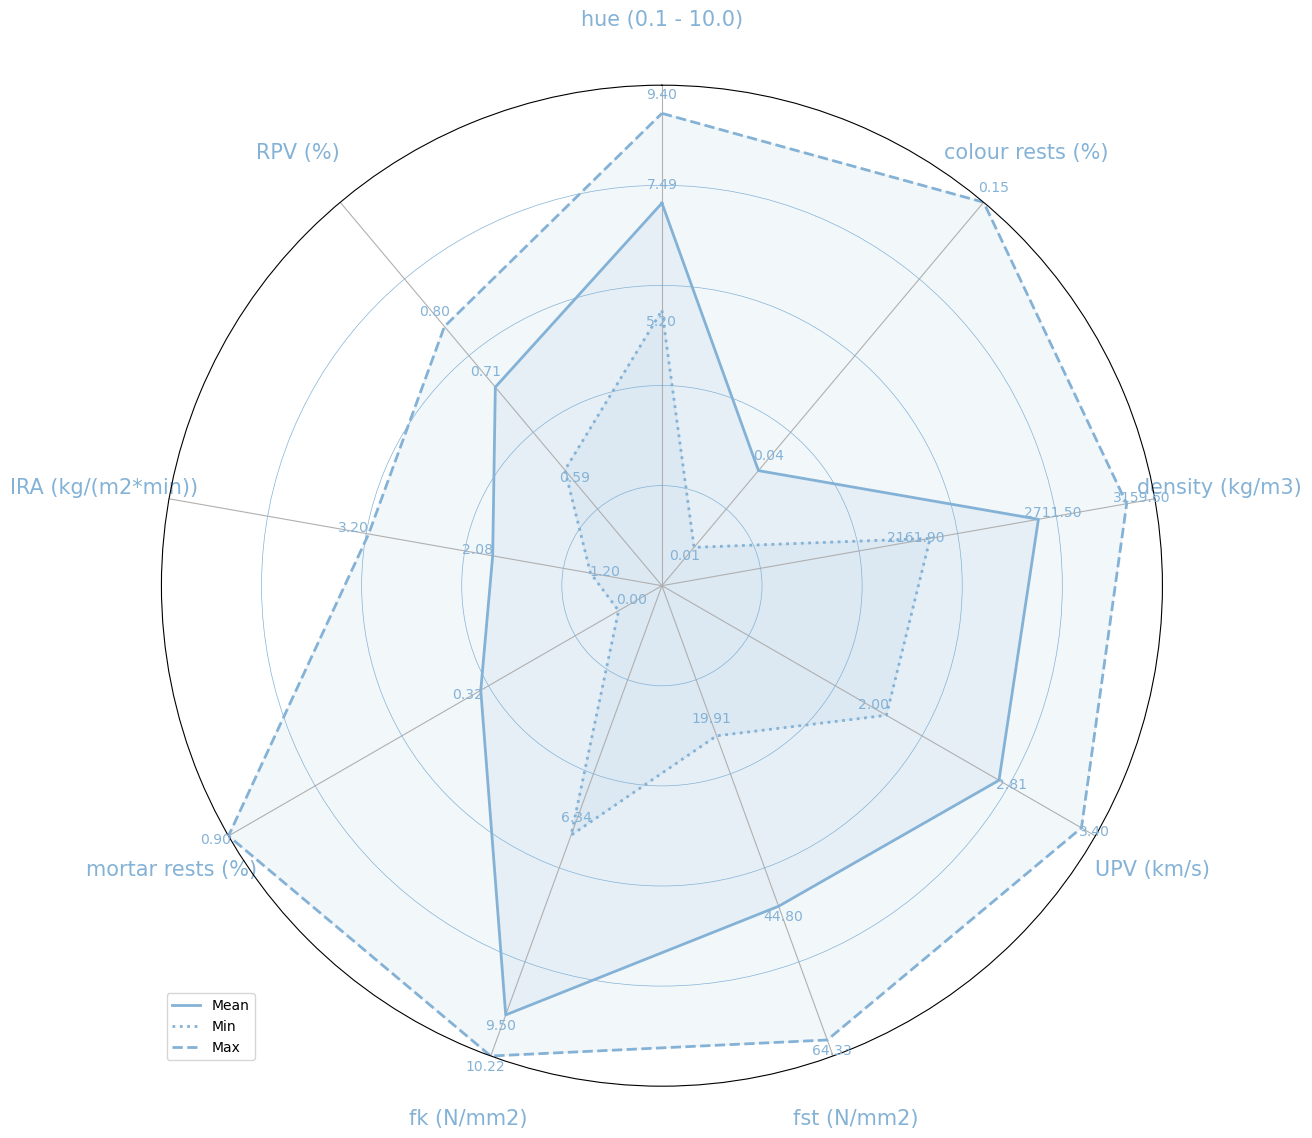

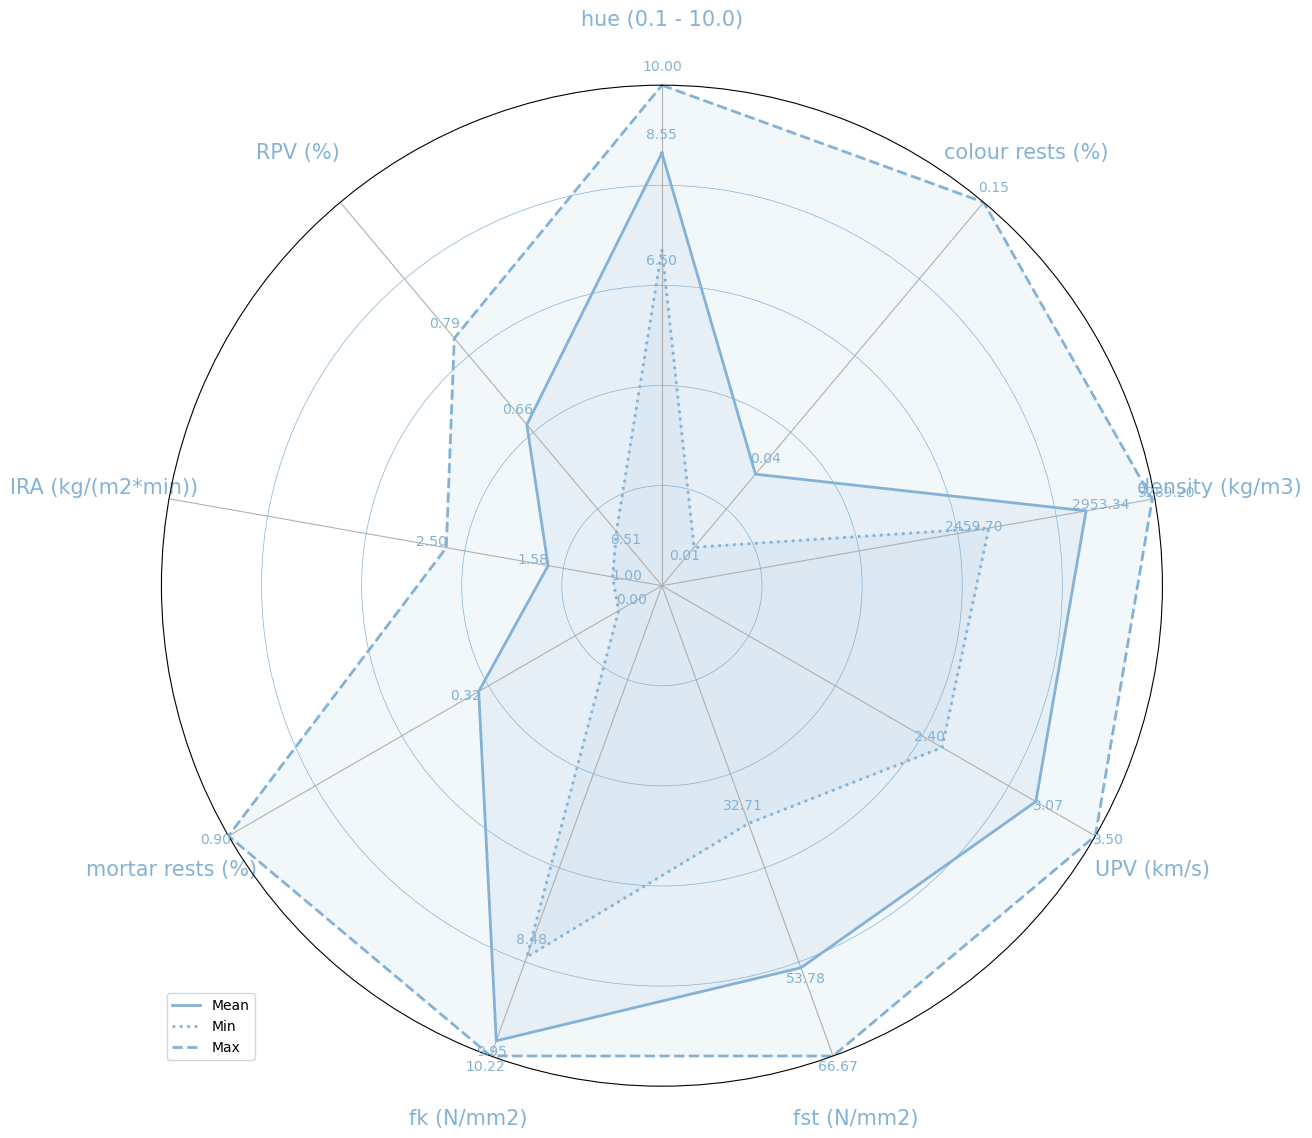

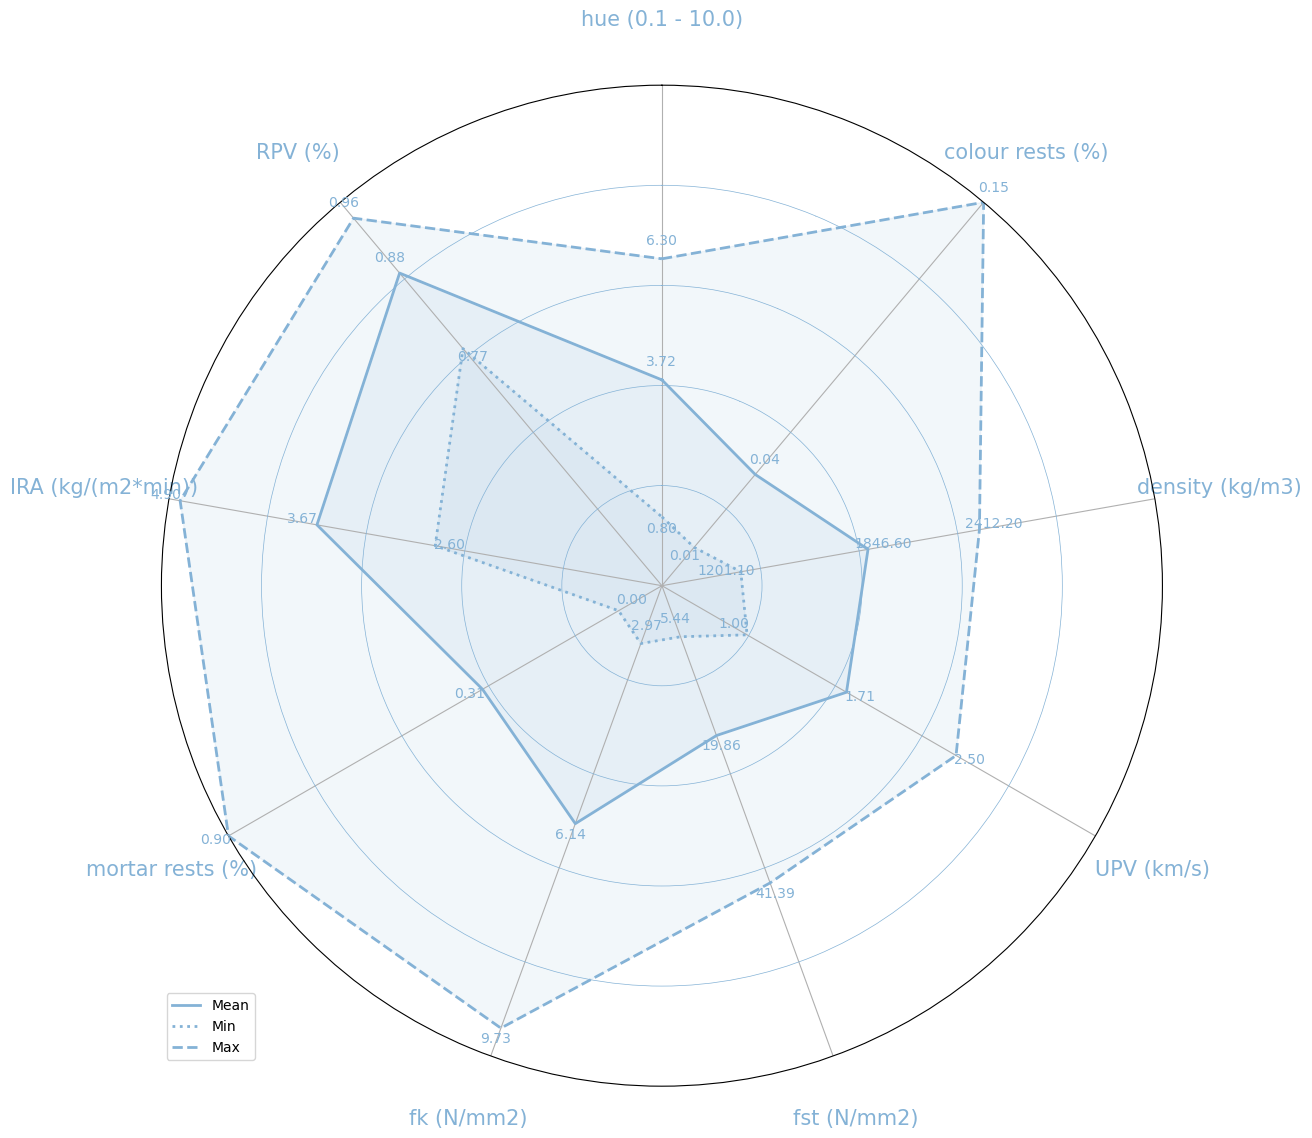

In [5]:
blue = "#84B2D6"
light_blue = "#8FC1E7"
dark_blue = "#6F96B3"

for cluster in cluster_means.index:
    mean_values = cluster_means.loc[cluster]
    min_values = cluster_min.loc[cluster]
    max_values = cluster_max.loc[cluster]
    
    normalised_mean_values = [
        normalise(mean_values[parameter], min_value, max_value) 
        for parameter, (min_value, max_value) in min_max_values.items()
    ]
    
    normalised_min_values = [
        normalise(min_values[parameter], min_value, max_value) 
        for parameter, (min_value, max_value) in min_max_values.items()
    ]
    
    normalised_max_values = [
        normalise(max_values[parameter], min_value, max_value) 
        for parameter, (min_value, max_value) in min_max_values.items()
    ]

    """Create radar chart"""
    
    categories = list(mean_values.keys())
    num_vars = len(categories)
   
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    
    normalised_mean_values += normalised_mean_values[:1]
    normalised_min_values += normalised_min_values[:1]
    normalised_max_values += normalised_max_values[:1]
    angles += angles[:1] 

    fig, ax = plt.subplots(figsize=(13, 13), subplot_kw={"polar": True})
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    


    plt.xticks(angles[:-1], categories, color = blue, size=15)
    ax.xaxis.set_tick_params(pad = 37)


    
    # MEAN
    ax.plot(angles, normalised_mean_values, color = blue, linewidth= 2, linestyle = "-", label = "Mean")
    ax.fill(angles, normalised_mean_values, color = blue, alpha=0.1) 
    
    # MIN
    ax.plot(angles, normalised_min_values, color = blue, linewidth=2, linestyle=":", label="Min")
    ax.fill(angles, normalised_min_values, color= blue, alpha=0.1) 
    
    # MAX
    ax.plot(angles, normalised_max_values, color = blue, linewidth=2, linestyle="--", label="Max")
    ax.fill(angles, normalised_max_values, color = blue, alpha=0.1) 

    plt.yticks([0.2, 0.4, 0.6, 0.8], ["0.2", "0.4", "0.6", "0.8"], color = blue, size=0)
    plt.ylim(0, 1)
    
    ax.yaxis.grid(color = blue, linestyle="-", linewidth=0.5)
    
    print(f"\nCluster {cluster}:")


    for i, (angle, norm_mean, norm_min, norm_max) in enumerate(zip(angles[:-1], normalised_mean_values[:-1], normalised_min_values[:-1], normalised_max_values[:-1])):
        real_value_mean = mean_values[categories[i]]
        real_value_min = min_values[categories[i]]
        real_value_max = max_values[categories[i]]


        ax.text(angle, norm_mean + 0.03, f"{real_value_mean:.2f}", color=blue, size= 10, ha="center", zorder=10)
        ax.text(angle, norm_min - 0.03, f"{real_value_min:.2f}", color=blue, size= 10, ha="center", zorder=10)
        ax.text(angle, norm_max + 0.03, f"{real_value_max:.2f}", color=blue, size= 10, ha="center", zorder=10)

        print(f"{categories[i]} (min, max, mean): {real_value_min:.2f}, {real_value_max:.2f}, {real_value_mean:.2f}")

    ax.legend(loc="upper right", bbox_to_anchor=(0.1, 0.1))

    #plt.title(f"Cluster {cluster}", size= 20, color=blue, y=1.1)
    #plt.savefig(f"{date}_{name}_k-{cluster}.png")
    #plt.close(fig)